In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# plt.rcParams['figure.figsize'] = (15,15)
# plt.rcParams.update({'font.size': 12})

In [76]:
# hard-coded parameters corresponding to test conditions,
# because my code is poorly planned out
NPOS_TEST = 6000
NNEG_TEST = 3457
NTRAINING = 6000

In [77]:
df = pd.read_csv('hogsvm_result_all.csv')
df

,Test,Cells per Block,Pixels per Cell,Orientations,Feature Size,AUC,Accuracy,Precision,Recall,Training Accuracy,Prediction Time (s),TP,TN,FP,FN
0,1,1,5,6,1152,0.993732,0.964048,0.964487,0.964048,1.000000,0.694108,3337,5780,220,120
1,2,1,5,8,1536,0.994946,0.971132,0.971361,0.971132,1.000000,0.978355,3355,5829,171,102
2,3,1,5,9,1728,0.995421,0.971873,0.972154,0.971873,1.000000,1.113992,3364,5827,173,93
3,4,1,5,10,1920,0.996028,0.973142,0.973330,0.973142,1.000000,1.223726,3361,5842,158,96
4,5,1,5,12,2304,0.996425,0.975362,0.975538,0.975362,1.000000,1.410226,3371,5853,147,86
5,6,1,6,6,780,0.994437,0.967009,0.967191,0.967009,0.999500,0.668172,3329,5816,184,128
6,7,1,6,8,1040,0.996197,0.972719,0.972858,0.972719,1.000000,0.654248,3353,5846,154,104
7,8,1,6,9,1170,0.996136,0.970921,0.971141,0.970921,1.000000,0.742983,3353,5829,171,104
8,9,1,6,10,1300,0.996790,0.973988,0.974116,0.973988,1.000000,0.824797,3358,5853,147,99
9,10,1,6,12,1560,0.997322,0.976843,0.976967,0.976843,1.000000,1.130975,3372,5866,134,85


In [78]:
# parameters to minimise people not being identified (FN)
# * Precision = TP/(TP+FP)  <--- classified P
# * Recall    = TP/(TP+FN)  <--- actually P

df['Miss Rate'] = df['FN'] / (df['TP'] + df['FN'])   # MR = (1 - Recall)
df.loc[df['FN'].idxmin()]

Test                      35.000000
Cells per Block            3.000000
Pixels per Cell            5.000000
Orientations              12.000000
Feature Size           15120.000000
AUC                        0.999103
Accuracy                   0.985725
Precision                  0.985850
Recall                     0.985725
Training Accuracy          1.000000
Prediction Time (s)       10.348522
TP                      3418.000000
TN                      5904.000000
FP                        96.000000
FN                        39.000000
Miss Rate                  0.011281
Name: 34, dtype: float64

In [79]:
# parameters to maximise Accuracy
max_accuracy_row = df.loc[df['Accuracy'].idxmax()]
max_accuracy_row # (same as the row with min FN?)

Test                     25.000000
Cells per Block           2.000000
Pixels per Cell           6.000000
Orientations             12.000000
Feature Size           5184.000000
AUC                       0.999261
Accuracy                  0.987100
Precision                 0.987149
Recall                    0.987100
Training Accuracy         1.000000
Prediction Time (s)       3.660725
TP                     3412.000000
TN                     5923.000000
FP                       77.000000
FN                       45.000000
Miss Rate                 0.013017
Name: 24, dtype: float64

In [80]:
# https://matplotlib.org/3.1.1/gallery/mplot3d/3d_bars.html
# https://stackoverflow.com/questions/9433240/python-matplotlib-3d-bar-plot-adjusting-tick-label-position-transparent-b/9464391
# https://stackoverflow.com/questions/43869751/change-bar-color-in-a-3d-bar-plot-in-matplotlib-based-on-value
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

def str_dim(l):
    return tuple(map(lambda v: '{0}x{0}'.format(v), l))

def plot_bar3d(x_labels, y_labels, dz_np, z_lim_min, z_lim_max, x_title, y_title, z_title, fig_title):
    # (x,y,z) coordinates of each bar
    x = list(range(len(x_labels))) * int(len(dz_np)/len(x_labels))
    y = [v for v in list(range(len(y_labels))) for i in range(int(len(dz_np)/len(y_labels)))]
    z = [0] * len(dz_np)
    # (width,depth,height) of each bar
    thickness = 0.4
    dx = [thickness] * len(dz_np)
    dy = [thickness] * len(dz_np)
    dz = list(dz_np)

    colors = plt.cm.jet(dz_np/dz_np.max())

    fig = plt.figure() # OOP style
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.bar3d(x,y,z,dx,dy,dz,color=colors)

    tick_offset = thickness/2
    ztick_increment = 0.5
    ticksx = np.arange(tick_offset, len(x_labels), 1)
    ax1.set_xticks(ticksx)
    ax1.set_xticklabels(x_labels)
    ticksy = np.arange(tick_offset, len(y_labels), 1)
    ax1.set_yticks(ticksy)
    ax1.set_yticklabels(y_labels)
    ticksz = np.arange(0, z_lim_max-z_lim_min+ztick_increment, ztick_increment)
    ticksz_labels = list(map(lambda v: '{:.1f}'.format(v), np.linspace(z_lim_min, z_lim_max, num=len(ticksz))))
    ax1.set_zticks(ticksz)
    ax1.set_zticklabels(ticksz_labels)

    ax1.set_xlabel(x_title)
    ax1.set_ylabel(y_title)
    ax1.set_zlabel(z_title)
    ax1.set_title(fig_title)

    fig.tight_layout()
    return fig, ax1

<IPython.core.display.Javascript object>


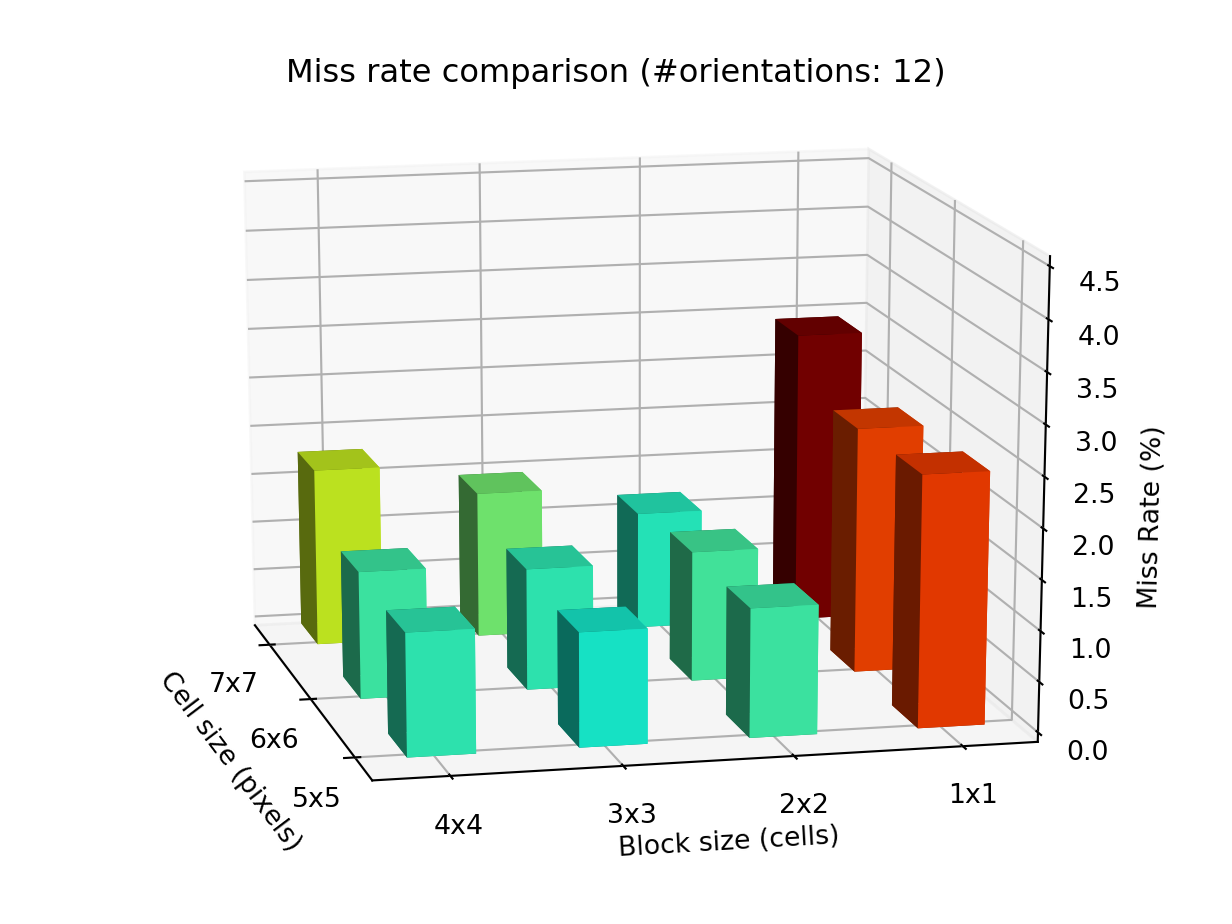

In [81]:
# plot 3D: (cell size, block size, miss rate) for fixed orientation
best_orientations = max_accuracy_row.get(key='Orientations')
df_missrate3d = df.loc[df['Orientations']==best_orientations]
df_missrate3d = df_missrate3d.loc[:, ['Pixels per Cell', 'Cells per Block', 'Miss Rate']]

z_lim_min = 0
z_lim_max = 4.5
cellsize_labels = str_dim(df_missrate3d['Pixels per Cell'].unique())
blocksize_labels = str_dim(df_missrate3d['Cells per Block'].unique())
dz_np = df_missrate3d['Miss Rate'] * 100 - z_lim_min

fig, ax1 = plot_bar3d(cellsize_labels, blocksize_labels, dz_np, z_lim_min, z_lim_max,
                      'Cell size (pixels)', 'Block size (cells)', 'Miss Rate (%)', 
                      'Miss rate comparison (#orientations: {})'.format(int(best_orientations)))
ax1.view_init(elev=16, azim=167)
plt.show()

In [82]:
print('Max miss rate:')
print(df_missrate3d.loc[df_missrate3d['Miss Rate'].idxmax()])
print('\nMin miss rate:')
print(df_missrate3d.loc[df_missrate3d['Miss Rate'].idxmin()])
df_missrate3d

Max miss rate:
Pixels per Cell    7.000000
Cells per Block    1.000000
Miss Rate          0.029505
Name: 14, dtype: float64

Min miss rate:
Pixels per Cell    5.000000
Cells per Block    3.000000
Miss Rate          0.011281
Name: 34, dtype: float64


,Pixels per Cell,Cells per Block,Miss Rate
4,5,1,0.024877
9,6,1,0.024588
14,7,1,0.029505
19,5,2,0.012728
24,6,2,0.013017
29,7,2,0.011860
34,5,3,0.011281
39,6,3,0.012149
44,7,3,0.014753
49,5,4,0.012149


<IPython.core.display.Javascript object>


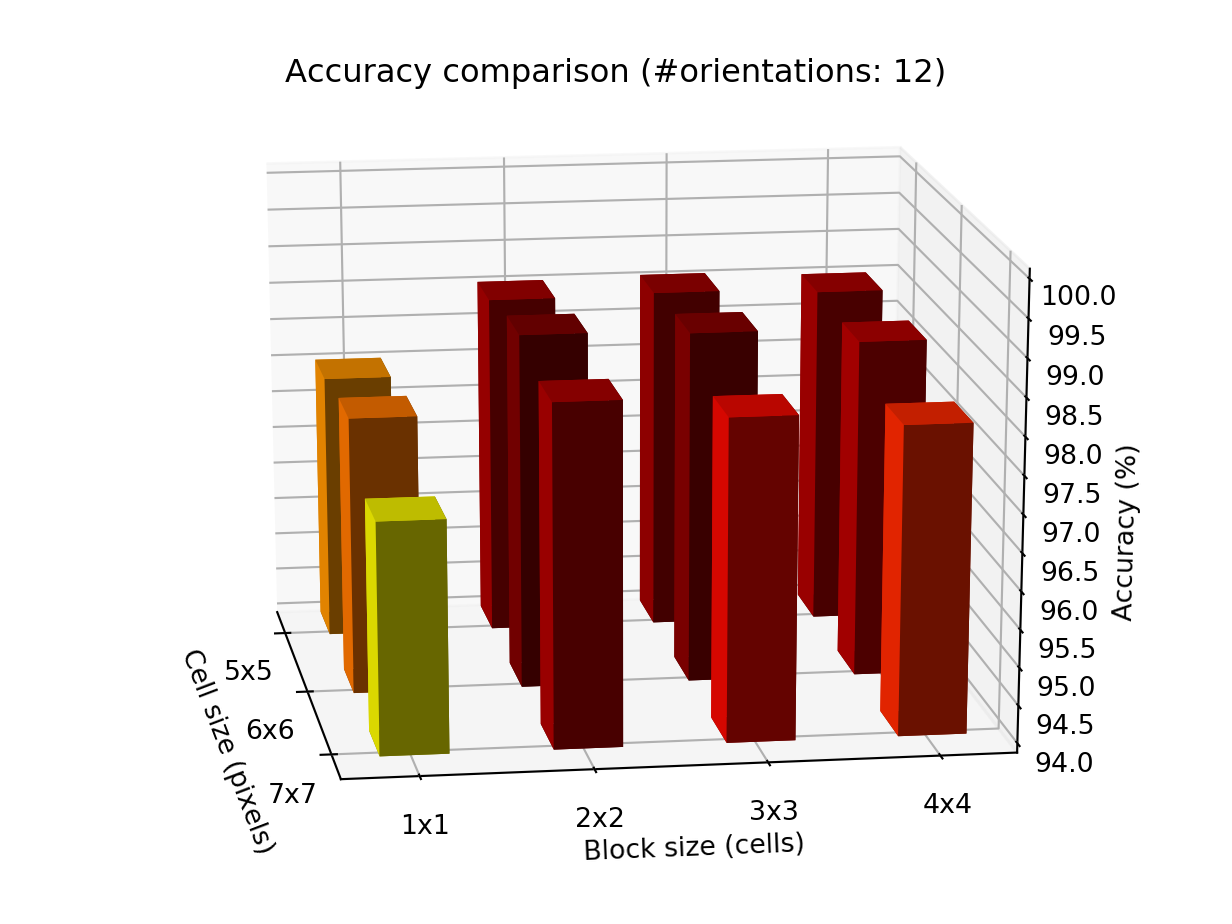

In [83]:
# plot 3D: (cell size, block size, accuracy) for fixed orientation
best_orientations = max_accuracy_row.get(key='Orientations')
df_accuracy3d = df.loc[df['Orientations']==best_orientations]
df_accuracy3d = df_accuracy3d.loc[:, ['Pixels per Cell', 'Cells per Block', 'Accuracy']]

z_lim_min = 94
z_lim_max = 100
cellsize_labels = str_dim(df_accuracy3d['Pixels per Cell'].unique())
blocksize_labels = str_dim(df_accuracy3d['Cells per Block'].unique())
dz_np = df_accuracy3d['Accuracy'] * 100 - z_lim_min

fig, ax1 = plot_bar3d(cellsize_labels, blocksize_labels, dz_np, z_lim_min, z_lim_max, 
                      'Cell size (pixels)', 'Block size (cells)', 'Accuracy (%)', 
                      'Accuracy comparison (#orientations: {})'.format(int(best_orientations)))

ax1.view_init(elev=17, azim=-11)
plt.show()

# # (x,y,z) coordinates of each bar
# z_lim_min = 94
# x = list(range(len(cellsize_labels))) * int(len(df_accuracy3d)/len(cellsize_labels))
# y = [v for v in list(range(len(blocksize_labels))) for i in range(int(len(df_accuracy3d)/len(blocksize_labels)))]
# z = [0] * len(df_accuracy3d)
# # (width,depth,height) of each bar
# thickness = 0.4
# dx = [thickness] * len(df_accuracy3d)
# dy = [thickness] * len(df_accuracy3d)
# dz_np = df_accuracy3d['Accuracy'] * 100 - z_lim_min
# dz = list(dz_np)

# colors = plt.cm.jet(dz_np/dz_np.max())

# fig = plt.figure() # OOP style
# ax1 = fig.add_subplot(111, projection='3d')
# ax1.bar3d(x,y,z,dx,dy,dz,color=colors)

# tick_offset = thickness/2
# ztick_increment = 0.5
# ticksx = np.arange(tick_offset, len(cellsize_labels), 1)
# plt.xticks(ticksx, cellsize_labels)
# ticksy = np.arange(tick_offset, len(blocksize_labels), 1)
# plt.yticks(ticksy, blocksize_labels)
# ticksz = np.arange(0,100-z_lim_min+ztick_increment,ztick_increment)
# ticksz_labels = list(map(lambda v: '{:.1f}'.format(v), np.linspace(z_lim_min, 100, num=len(ticksz))))
# ax1.set_zticks(ticksz)
# ax1.set_zticklabels(ticksz_labels)

# ax1.set_xlabel('Cell size (pixels)')
# ax1.set_ylabel('Block size (cells)')
# ax1.set_zlabel('Accuracy (%)')
# ax1.set_title('Accuracy comparison (#orientations: {})'.format(int(best_orientations)))

# fig.tight_layout()
# plt.show()

In [84]:
print('Max accuracy:')
print(df_accuracy3d.loc[df_accuracy3d['Accuracy'].idxmax()])
print('\nMin accuracy:')
print(df_accuracy3d.loc[df_accuracy3d['Accuracy'].idxmin()])
df_accuracy3d

Max accuracy:
Pixels per Cell    6.0000
Cells per Block    2.0000
Accuracy           0.9871
Name: 24, dtype: float64

Min accuracy:
Pixels per Cell    7.000000
Cells per Block    1.000000
Accuracy           0.970604
Name: 14, dtype: float64


,Pixels per Cell,Cells per Block,Accuracy
4,5,1,0.975362
9,6,1,0.976843
14,7,1,0.970604
19,5,2,0.985408
24,6,2,0.987100
29,7,2,0.985090
34,5,3,0.985725
39,6,3,0.986677
44,7,3,0.982447
49,5,4,0.985196
